## premise: analyze the distributions of features in the model
[per](https://stackoverflow.com/a/56301555)

In [21]:
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip3 install imblearn
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.var_model import VARResults, VARResultsWrapper

In [15]:
#demonstrate a distribution of features inside one and zero classes
df =pd.read_csv("0 Data Processing/binary_binned_pipeline.csv")
df.columns  

Index(['Unnamed: 0', 'group', 'time', 's_MP', 'change', 'type', 'p_MP',
       'precursor_buy_cap_pct_change', 'precursor_ask_cap_pct_change',
       'precursor_bid_vol_pct_change', 'precursor_ask_vol_pct_change',
       'length', 'sum_change', 'max_surge_mp', 'min_surge_mp',
       'max_precursor_mp', 'min_precursor_mp', 'area', 'surge_targets_met_pct',
       'group.1', 'time.1', 's_MP.1', 'change.1', 'type.1', 'p_MP.1',
       'precursor_buy_cap_pct_change.1', 'precursor_ask_cap_pct_change.1',
       'precursor_bid_vol_pct_change.1', 'precursor_ask_vol_pct_change.1',
       'length.1', 'sum_change.1', 'max_surge_mp.1', 'min_surge_mp.1',
       'max_precursor_mp.1', 'min_precursor_mp.1', 'area.1', 'surge_area',
       'surge_targets_met_pct.1', 'label'],
      dtype='object')

In [18]:
keepable = ['precursor_buy_cap_pct_change', 
            'precursor_ask_cap_pct_change',
            'precursor_bid_vol_pct_change', 
            'precursor_ask_vol_pct_change',
            'sum_change','length','label']
df = df[keepable]

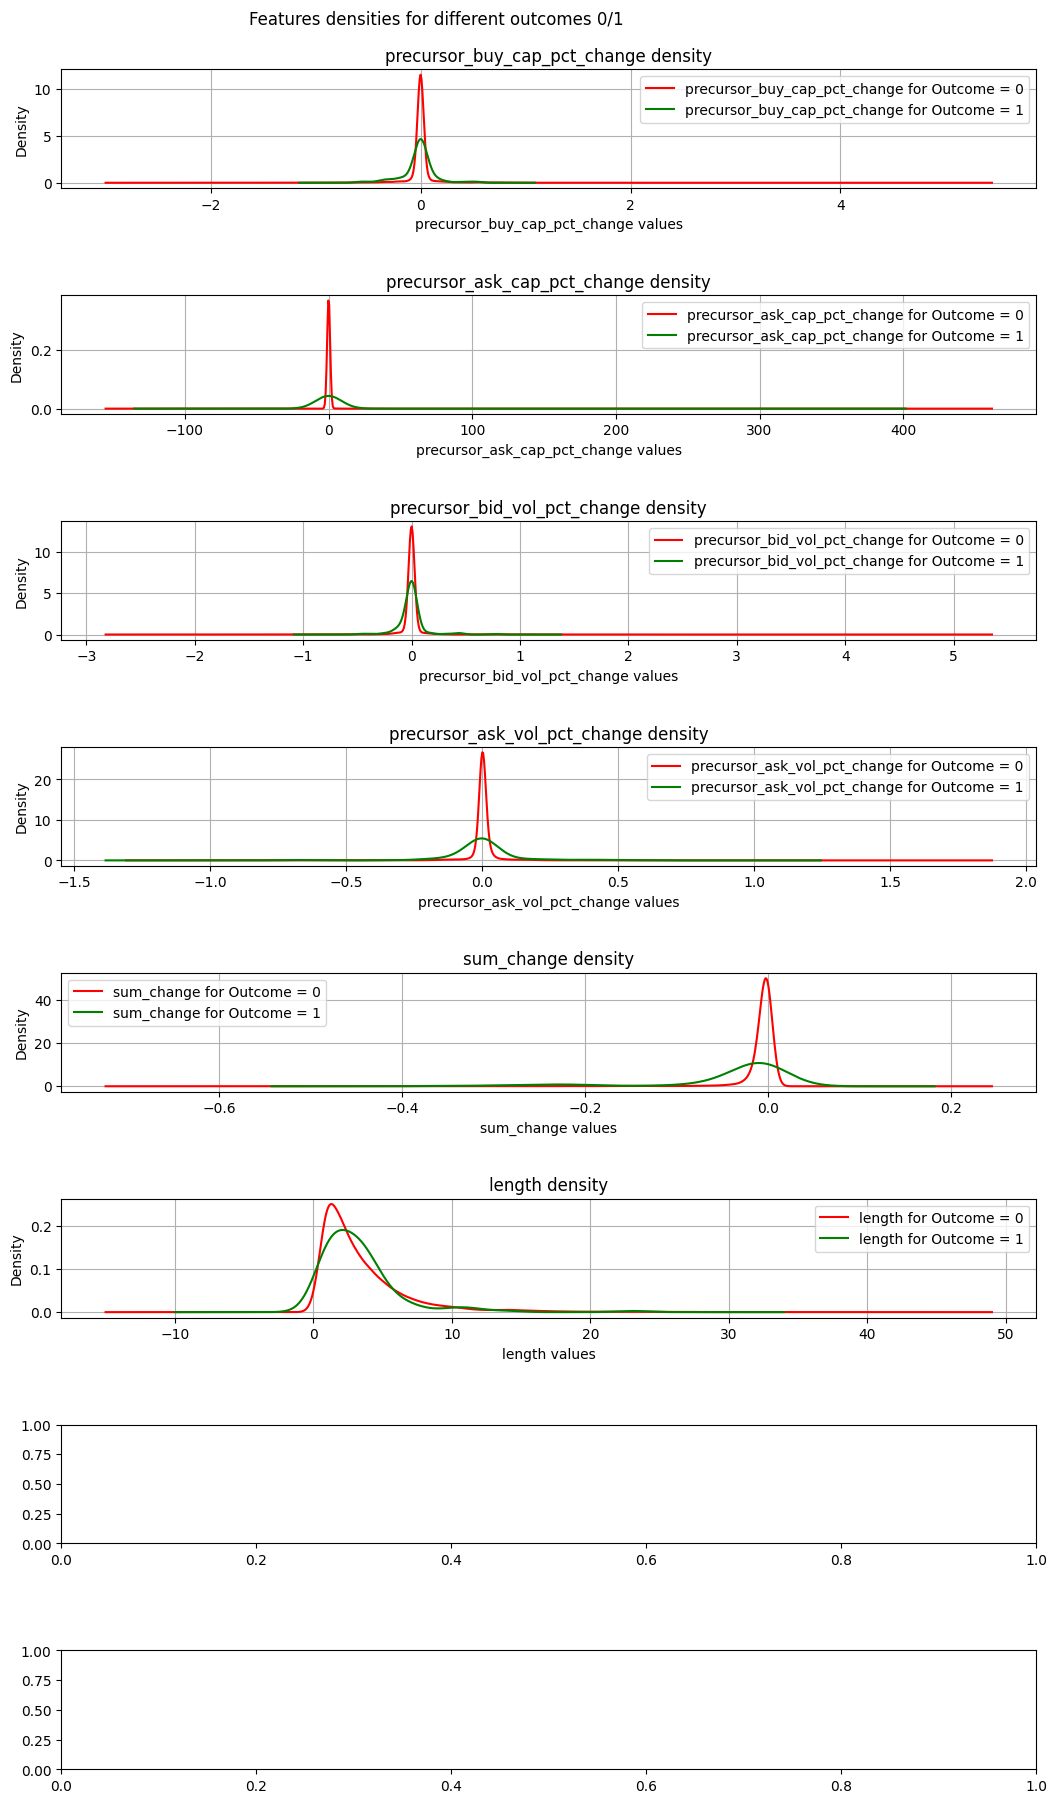

In [20]:
def plot_densities(data):
    '''
    Plot features densities depending on the outcome values
    '''
    # change fig size to fit all subplots beautifully 
    rcParams['figure.figsize'] = 15, 20

    # separate data based on outcome values 
    outcome_0 = df[df['label'] == 0]
    outcome_1 = df[df['label'] == 1]

    # init figure
    fig, axs = plt.subplots(8, 1)
    fig.suptitle('Features densities for different outcomes 0/1')
    plt.subplots_adjust(left = 0.25, right = 0.9, bottom = 0.1, top = 0.95,
                        wspace = 0.2, hspace = 0.9)

    # plot densities for outcomes
    for column_name in names[:-1]: 
        ax = axs[names.index(column_name)]
        #plt.subplot(4, 2, names.index(column_name) + 1)
        outcome_0[column_name].plot(kind='density', ax=ax, subplots=True, 
                                    sharex=False, color="red", legend=True,
                                    label=column_name + ' for Outcome = 0')
        outcome_1[column_name].plot(kind='density', ax=ax, subplots=True, 
                                     sharex=False, color="green", legend=True,
                                     label=column_name + ' for Outcome = 1')
        ax.set_xlabel(column_name + ' values')
        ax.set_title(column_name + ' density')
        ax.grid('on')
    plt.show()
    fig.savefig('densities.png')

# load your data 
# data  = pd.read_csv('diabetes.csv')
names = list(df.columns)

# plot correlation & densities
plot_densities(df)

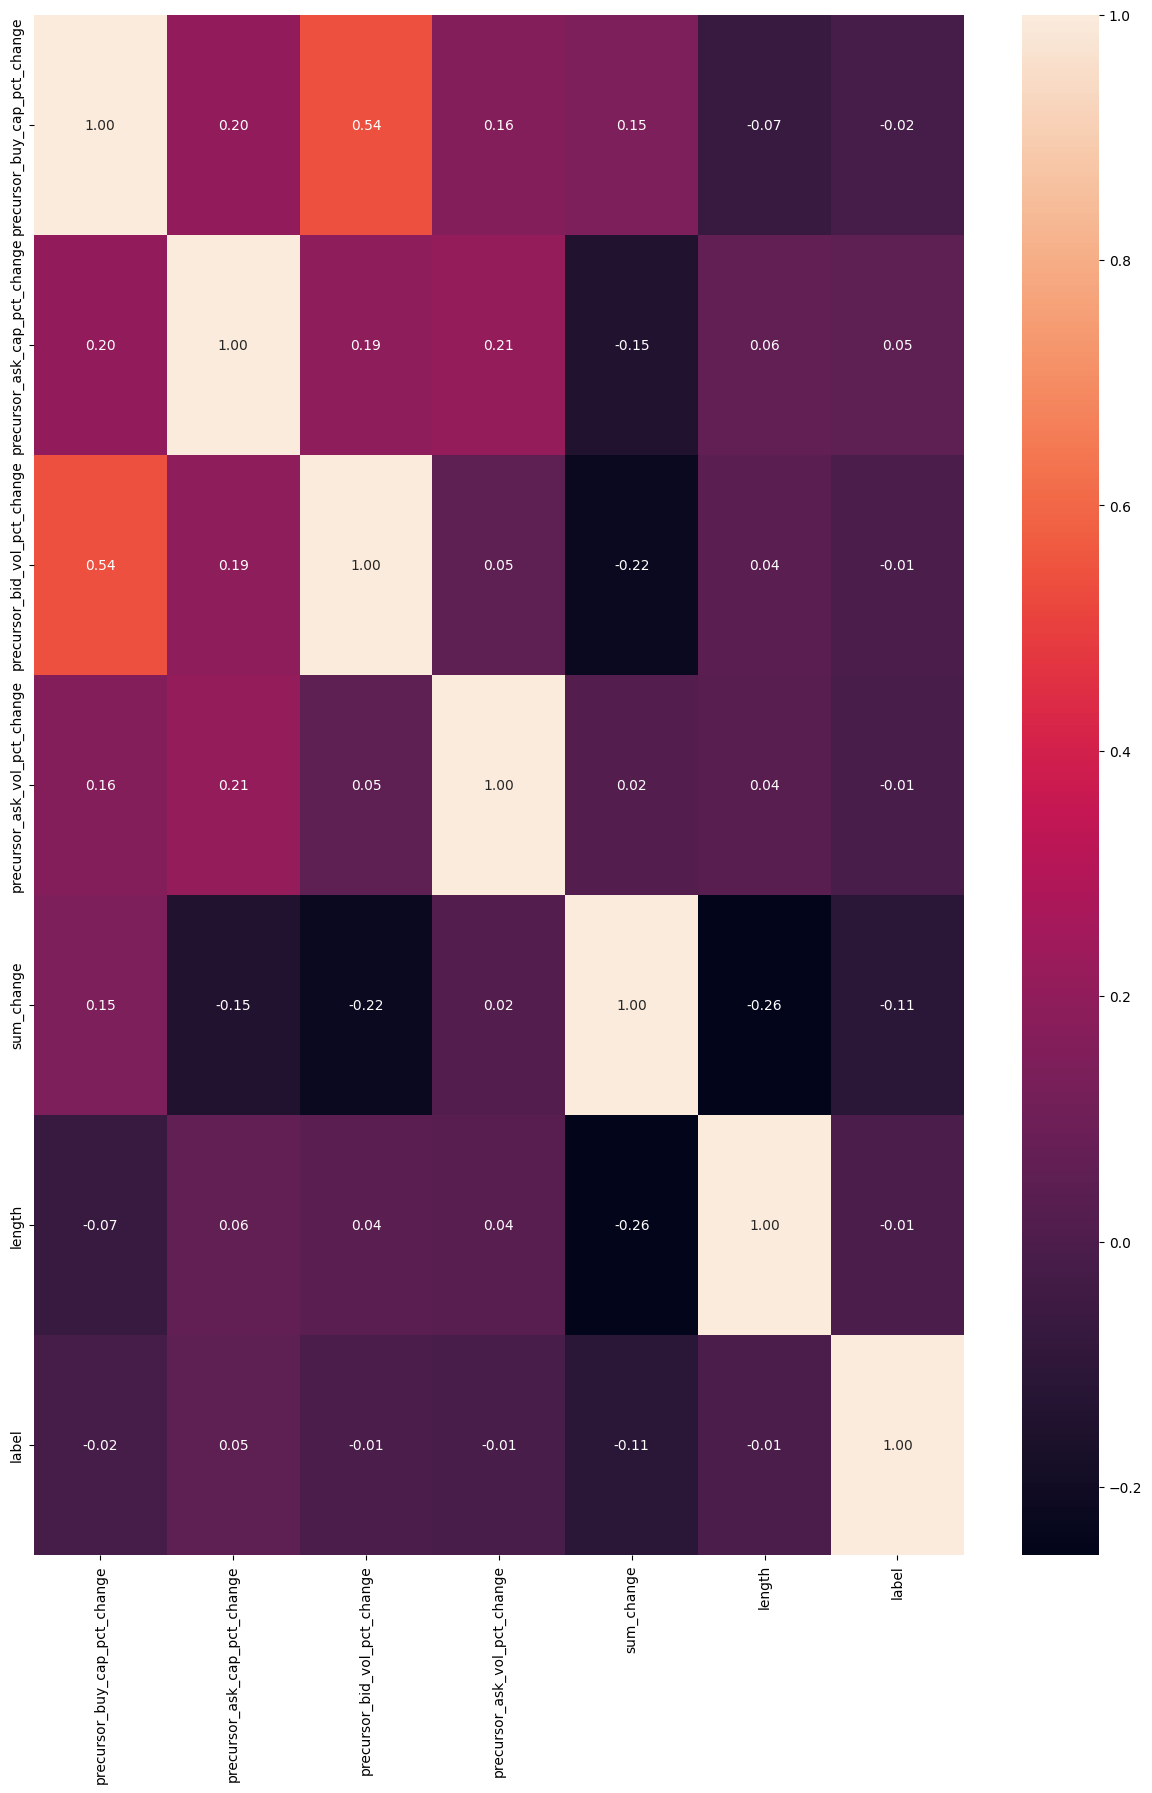

In [23]:
def plot_correlation(data):
    '''
    plot correlation's matrix to explore dependency between features 
    '''
    # init figure size
    rcParams['figure.figsize'] = 15, 20
    fig = plt.figure()
    sns.heatmap(data.corr(), annot=True, fmt=".2f")
    plt.show()
    fig.savefig('corr.png')

# load your data 
# data  = pd.read_csv('diabetes.csv')

# plot correlation & de
plot_correlation(df)


In [25]:
    # separate data based on outcome values 
    outcome_0 = df[df['label'] == 0]
    outcome_1 = df[df['label'] == 1]

In [40]:
dim = ['mean', 'min', '25%', '50%', '75%']

In [51]:
# # clear the chart
# plt.clf()
# study0 =outcome_0.describe(include='all').transpose()
# print(study0.columns)
# study0[dim].plot(kind='bar')
# plt.show()

In [48]:
# # clear the chart
# plt.clf()
# study1 =outcome_1.describe(include='all').transpose()
# # print(study1.columns)
# study1[dim].plot(kind='bar')
# plt.show()

In [57]:
# display the mean of each column in each dataframe
print('Outcome 0:')
print(outcome_0.mean())
print('\nOutcome 1:')
print(outcome_1.mean())

Outcome 0:
precursor_buy_cap_pct_change   -0.000021
precursor_ask_cap_pct_change    0.201546
precursor_bid_vol_pct_change    0.008106
precursor_ask_vol_pct_change    0.003753
sum_change                     -0.010565
length                          3.511807
label                           0.000000
dtype: float64

Outcome 1:
precursor_buy_cap_pct_change   -0.021884
precursor_ask_cap_pct_change    2.587411
precursor_bid_vol_pct_change   -0.000987
precursor_ask_vol_pct_change   -0.002147
sum_change                     -0.040969
length                          3.295455
label                           1.000000
dtype: float64


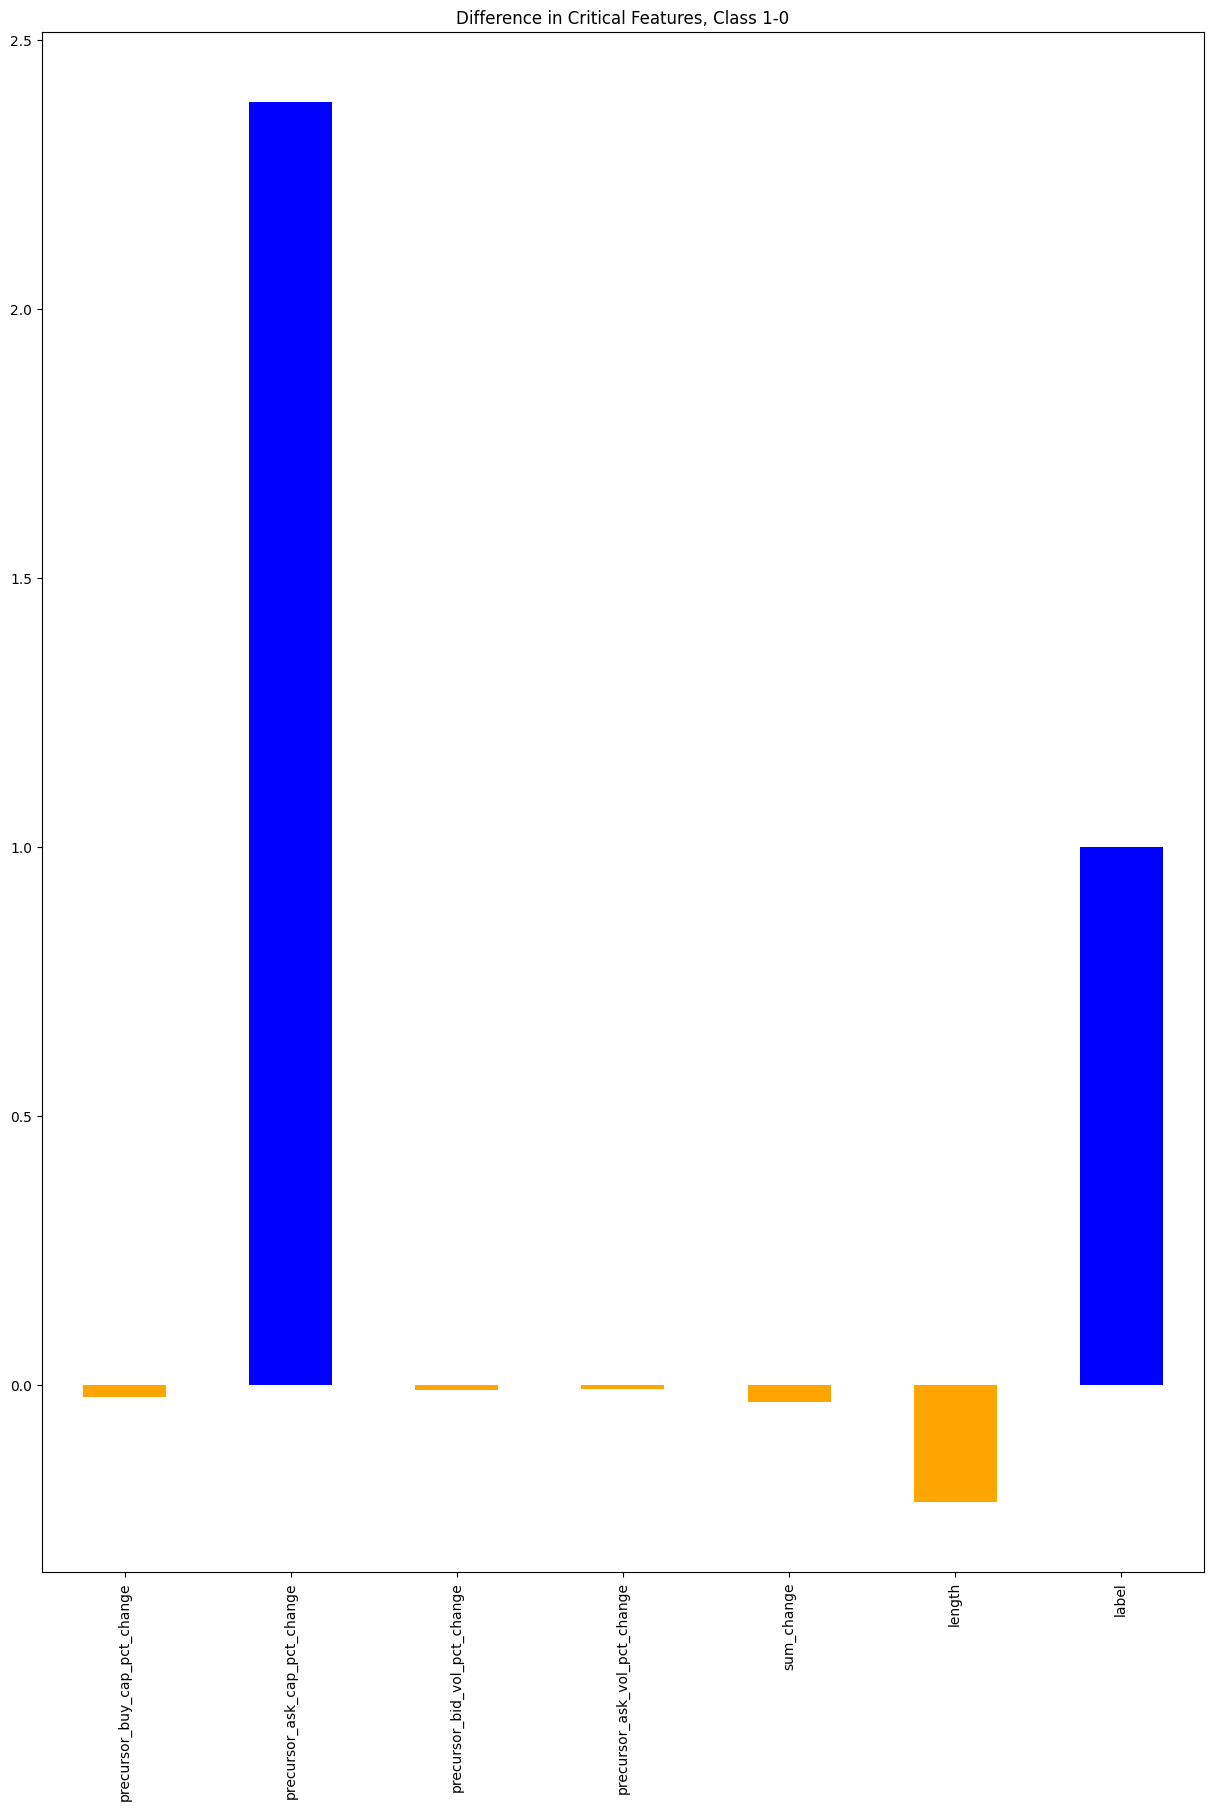

In [64]:
plt.clf()
mean1 = outcome_0.mean()
mean2 = outcome_1.mean()
diff = mean2 - mean1
colors = ['orange' if x < 0 else 'blue' for x in diff]

ax = diff.plot(kind='bar',color=colors)
ax.set_title('Difference in Critical Features, Class 1-0')
plt.show()

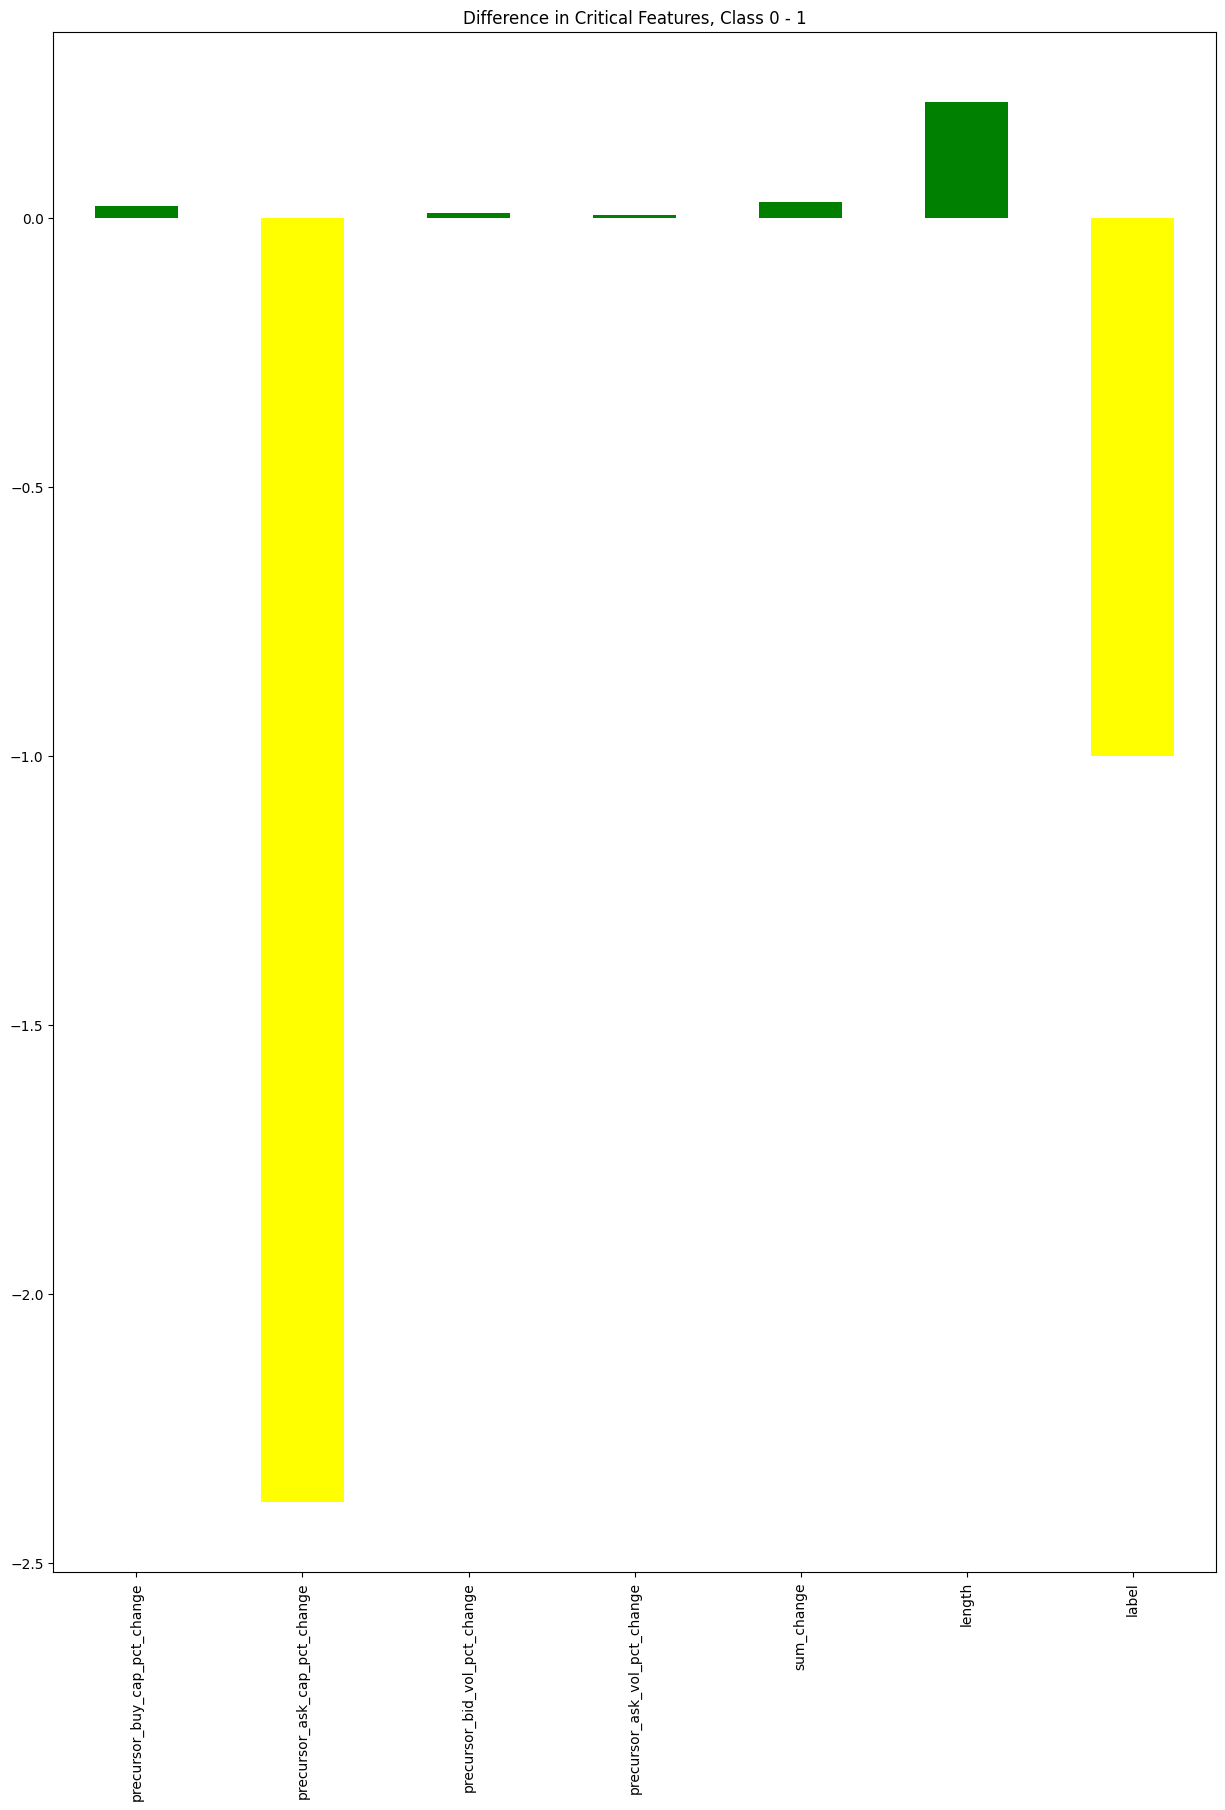

In [67]:
plt.clf()
mean1 = outcome_0.mean()
mean2 = outcome_1.mean()
diff = mean1 - mean2
colors = ['yellow' if x < 0 else 'green' for x in diff]

ax = diff.plot(kind='bar',color=colors)
ax.set_title('Difference in Critical Features, Class 0 - 1')
plt.show()

TypeError: unsupported operand type(s) for -: 'range' and 'float'

<Figure size 1500x2000 with 0 Axes>

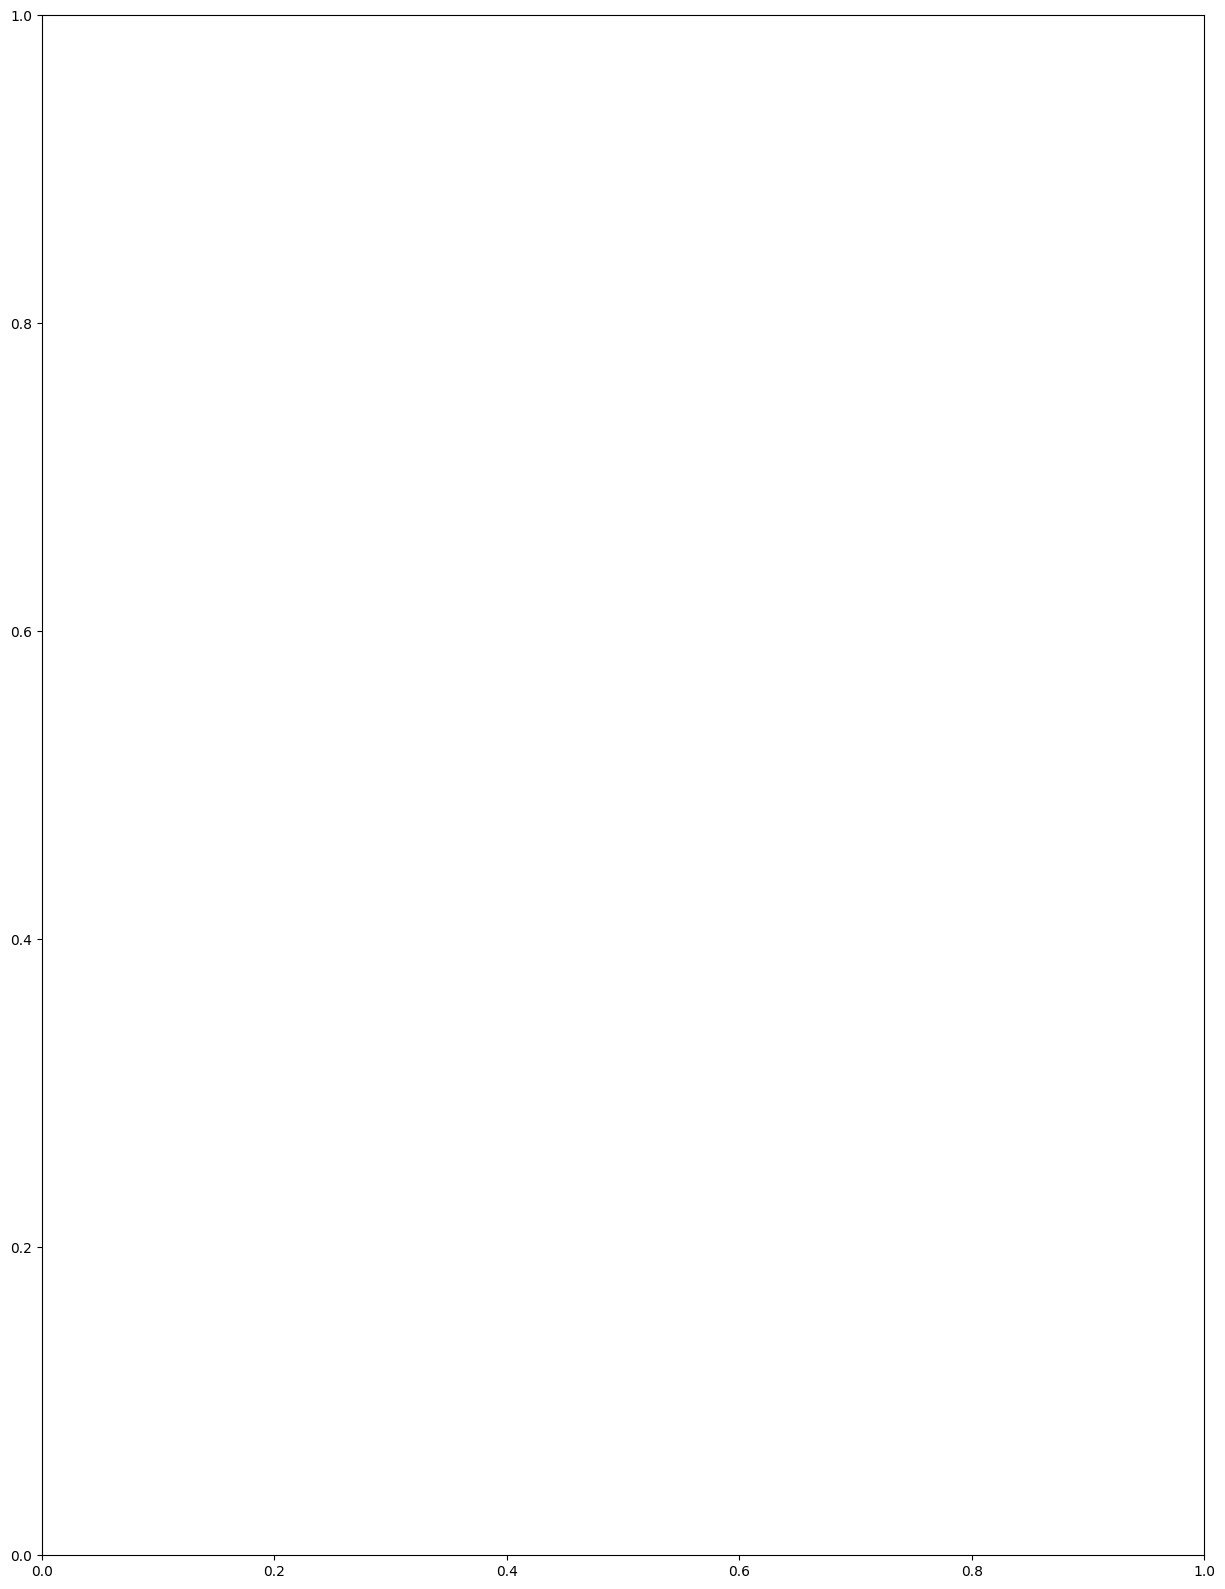

In [71]:
plt.clf()
# calculate the mean of each column for each dataframe
mean1 = outcome_0.mean()
mean2 = outcome_1.mean()

# create a list of column names
columns = mean1.index

# create a list of x positions for the bars
x = range(len(columns))

# create a figure and axis object
fig, ax = plt.subplots()

# plot the bars for each column
width = 0.35
ax.bar(x - width/2, mean1, width, label='Outcome 0')
ax.bar(x + width/2, mean2, width, label='Outcome 1')

# add labels and title
ax.set_xticks(x)
ax.set_xticklabels(columns)
ax.set_ylabel('Mean')
ax.set_title('Comparison of Means for Outcome 0 and Outcome 1')
ax.legend()

# show the chart
plt.show()

In [ ]:
def test_granger(df, p):
    """
    Fits a VAR(p) model on the input df and performs pairwise Granger Causality tests
    """
     # Fit VAR model on first-order differences
    model = VAR(df.diff().dropna())
    results = model.fit(p)
    
    # Initialize p-value matrix
    p_matrix = pd.DataFrame(index=df.columns, columns=df.columns)
    
    # Perform pairwise Granger Causality tests
    for caused in df.columns:
        for causing in df.columns:
            if caused != causing:
                test_result = results.test_causality(caused, causing)
                p_value = test_result.pvalue
                p_matrix.loc[caused, causing] = p_value
    # Ensure all columns have float dtype
    p_matrix = p_matrix.astype(float)
    return p_matrix

# Load data
p=7
# setx=['p_MP', 'p_change', 'p_buyCap', 'p_askCap', 'p_totalBidVol','p_totalAskVol',]

sendit0 = m2_pipeline[m2_pipeline['label']== '1']
p_matrix0 = test_granger(sendit0, p)
# p_matrix0
caul_mtrx = p_matrix0.rename(index={item: f"{item} caused by" for item in p_matrix0.index})
caul_mtrx.where(caul_mtrx.isna(), caul_mtrx <= 0.01)